In [1025]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras



from tqdm import tqdm

In [469]:
path ='./movielens'

In [576]:
os.listdir(path)

['links.csv',
 'tags.csv',
 'ratings.csv',
 'README.txt',
 '.ipynb_checkpoints',
 'movies.csv']

In [976]:
links = pd.read_csv(os.path.join(path,"links.csv"))

In [977]:
ratings_df  = pd.read_csv(os.path.join(path,"ratings.csv"),encoding='utf-8')

In [978]:
tags_df = pd.read_csv(os.path.join(path,"tags.csv"),encoding= 'utf-8')

In [979]:
movies_df = pd.read_csv(os.path.join(path,'movies.csv'),encoding = 'utf-8')

In [980]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [981]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [982]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## movies_df - genres

#### genres_onehot

In [983]:
genres_onehot_df = movies_df.genres.str.get_dummies("|")

In [984]:
movies_df.genres = movies_df.genres.str.split("|")

In [985]:
#movies_one_hot

In [986]:
movies_df = pd.concat([movies_df,genres_onehot_df],axis=1)

In [1030]:
movies_df.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## movies_df - year

In [988]:
movies_df['year'] = movies_df.title.str.extract('(\(\d\d\d\d\))').astype("str")

In [989]:
movies_df['year'] = movies_df['year'].apply(lambda x : x.replace("(","").replace(")",""))

In [990]:
movies_df.year = movies_df.year.astype("float32").astype("int32")

In [991]:
movies_df.drop(movies_df[movies_df.year == 0].index, inplace=True)

In [992]:
movies_df.drop("title",axis = 1,inplace = True)

In [993]:
movies_df.head()

,movieId,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,"[Comedy, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,5,[Comedy],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [994]:
print(movies_df.year.max())
print(movies_df.year.min())

2018
1902


In [995]:
bins = list(range(1900,2021,20))

In [996]:
bins

[1900, 1920, 1940, 1960, 1980, 2000, 2020]

In [997]:
labels = list(range(len(bins)-1))

In [998]:
year_label = []
for i in range(len(labels)):
    year_label.append(f"year_{i}")

In [999]:
year_label

['year_0', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5']

In [1000]:
year_level_df = pd.cut(movies_df.year,bins,labels = year_label, right = False)

In [1001]:
movies_df["year_level"] = year_level_df

In [1002]:
movies_df.head()

,movieId,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,year_level
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1995,year_4
1,2,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,year_4
2,3,"[Comedy, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,year_4
3,4,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995,year_4
4,5,[Comedy],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1995,year_4


#### years_onehot

In [1003]:
year_onehot_df = movies_df.year_level.astype('str').str.get_dummies()

In [1004]:
movies_df = pd.concat([movies_df,year_onehot_df],axis=1)

In [1005]:
movies_df.head()

,movieId,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,War,Western,year,year_level,year_0,year_1,year_2,year_3,year_4,year_5
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,...,0,0,1995,year_4,0,0,0,0,1,0
1,2,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,...,0,0,1995,year_4,0,0,0,0,1,0
2,3,"[Comedy, Romance]",0,0,0,0,0,1,0,0,...,0,0,1995,year_4,0,0,0,0,1,0
3,4,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,...,0,0,1995,year_4,0,0,0,0,1,0
4,5,[Comedy],0,0,0,0,0,1,0,0,...,0,0,1995,year_4,0,0,0,0,1,0


## cross feature
비선형성 추가를 위한 cross - > genre,year

In [1006]:
movies_df["cross_var"] =movies_df.apply(lambda x: [x["year_level"] +"_"+genre for genre in x["genres"]], axis=1)

In [1007]:
movies_df.head()

,movieId,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Western,year,year_level,year_0,year_1,year_2,year_3,year_4,year_5,cross_val
0,1,"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,0,...,0,1995,year_4,0,0,0,0,1,0,"[year_4_Adventure, year_4_Animation, year_4_Ch..."
1,2,"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,0,...,0,1995,year_4,0,0,0,0,1,0,"[year_4_Adventure, year_4_Children, year_4_Fan..."
2,3,"[Comedy, Romance]",0,0,0,0,0,1,0,0,...,0,1995,year_4,0,0,0,0,1,0,"[year_4_Comedy, year_4_Romance]"
3,4,"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,0,...,0,1995,year_4,0,0,0,0,1,0,"[year_4_Comedy, year_4_Drama, year_4_Romance]"
4,5,[Comedy],0,0,0,0,0,1,0,0,...,0,1995,year_4,0,0,0,0,1,0,[year_4_Comedy]


In [1008]:
from sklearn.preprocessing import MultiLabelBinarizer

In [1009]:
mlb = MultiLabelBinarizer()

In [1010]:
cross_var_df = pd.DataFrame(mlb.fit_transform(movies_df["cross_var"]),columns=mlb.classes_, index=movies_df.index)

In [1011]:
cross_var_df

,year_0_Action,year_0_Adventure,year_0_Animation,year_0_Comedy,year_0_Crime,year_0_Drama,year_0_Fantasy,year_0_Romance,year_0_Sci-Fi,year_0_War,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1012]:
movies_df = pd.concat([movies_df,cross_var_df],axis=1)

In [1013]:
movies_df.drop(["genres","cross_var","year","year_level"],axis=1 , inplace =True)

In [1014]:
movies_df.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


movieId + genres_onehot + year_onehot + cross_var(genres,year)

In [1015]:
ratings_df = pd.merge(ratings_df, movies_df , "inner" , on ="movieId")

In [1016]:
ratings_df.drop('timestamp',axis =1 ,inplace = True)

In [1055]:
target_df = ratings_df["rating"]

KeyError: 'rating'

In [1056]:
#0~3.5 ==> 0 4.0~5.0 ==> 1
binary_target_df = target_df.apply(lambda x: np.where(x<4.0 , 0 , 1)) 

In [1018]:
ratings_df.drop("rating",axis=1,inplace = True)

In [1019]:
ratings_df.head()

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## regression model test with cross var

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(ratings_df,target_df, test_size = 0.1)

In [1026]:
model = keras.models.Sequential([
    keras.layers.Dense(300,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(30,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1)
])

In [1027]:
model.compile(loss  = keras.losses.mean_squared_error,
             optimizer = "Adam")

In [1028]:
history = model.fit(X_train,y_train, epochs=10,
                   validation_data = (X_test,y_test))

Epoch 1/10
2836/2836 [==============================] - 1s 459us/step - loss: 68086.5063 - val_loss: 415.0786
Epoch 2/10
2836/2836 [==============================] - 1s 428us/step - loss: 11120.5823 - val_loss: 2.2829
Epoch 3/10
2836/2836 [==============================] - 1s 424us/step - loss: 166.8732 - val_loss: 2.4118
Epoch 4/10
2836/2836 [==============================] - 1s 433us/step - loss: 143.8033 - val_loss: 207.1089
Epoch 5/10
2836/2836 [==============================] - 1s 425us/step - loss: 22.3660 - val_loss: 2.0519
Epoch 6/10
2836/2836 [==============================] - 1s 425us/step - loss: 3.2292 - val_loss: 1.2721
Epoch 7/10
2836/2836 [==============================] - 1s 428us/step - loss: 18.7768 - val_loss: 1.2592
Epoch 8/10
2836/2836 [==============================] - 1s 424us/step - loss: 1.5355 - val_loss: 1.1366
Epoch 9/10
2836/2836 [==============================] - 1s 427us/step - loss: 1.2544 - val_loss: 1.0876
Epoch 10/10
2836/2836 [=======================

<AxesSubplot:>

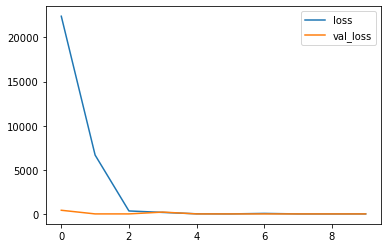

In [1029]:
pd.DataFrame(history.history).plot()

## regression model test - without cross var

In [1048]:
X_train,X_test,y_train,y_test = train_test_split(ratings_df_without_cross_df,target_df, test_size = 0.1)

In [1049]:
ratings_df_without_cross_df = ratings_df.iloc[:,:28]

In [1050]:
ratings_df_without_cross_df.head()

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Sci-Fi,Thriller,War,Western,year_0,year_1,year_2,year_3,year_4,year_5
0,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,17,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1051]:
model = keras.models.Sequential([
    keras.layers.Dense(300,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(30,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1)
])

In [1052]:
model.compile(loss  = keras.losses.mean_squared_error,
             optimizer = "Adam")

In [1053]:
history = model.fit(X_train,y_train, epochs=10,
                   validation_data = (X_test,y_test))

Epoch 1/10
2836/2836 [==============================] - 2s 440us/step - loss: 1330578.6551 - val_loss: 3.9580
Epoch 2/10
2836/2836 [==============================] - 1s 417us/step - loss: 139454.4086 - val_loss: 1787.8086
Epoch 3/10
2836/2836 [==============================] - 1s 420us/step - loss: 58327.9022 - val_loss: 2.5466
Epoch 4/10
2836/2836 [==============================] - 1s 421us/step - loss: 2730.5090 - val_loss: 91.4163
Epoch 5/10
2836/2836 [==============================] - 1s 420us/step - loss: 135.8380 - val_loss: 2.6416
Epoch 6/10
2836/2836 [==============================] - 1s 419us/step - loss: 2.1715 - val_loss: 1.3672
Epoch 7/10
2836/2836 [==============================] - 1s 415us/step - loss: 1.5227 - val_loss: 1.3873
Epoch 8/10
2836/2836 [==============================] - 1s 415us/step - loss: 165.5867 - val_loss: 1.0954
Epoch 9/10
2836/2836 [==============================] - 1s 414us/step - loss: 1.0914 - val_loss: 1.0910
Epoch 10/10
2836/2836 [===============

<AxesSubplot:>

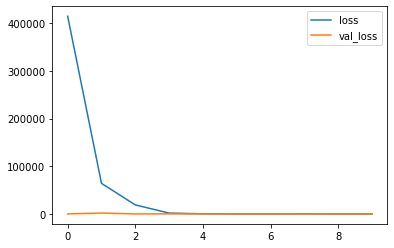

In [1054]:
pd.DataFrame(history.history).plot()

## binary classification with cross-var

In [1070]:
X_train,X_test,y_train,y_test = train_test_split(ratings_df,binary_target_df, test_size = 0.1)

In [1071]:
model = keras.models.Sequential([
    keras.layers.Dense(300,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(30,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [1072]:
model.compile(loss = keras.losses.binary_crossentropy,
             optimizer = "Adam")

In [1073]:
history = model.fit(X_train,y_train,
                   epochs= 10,
                    validation_data = (X_test,y_test)
                   )

Epoch 1/10
2836/2836 [==============================] - 1s 470us/step - loss: 43.5630 - val_loss: 6.1128
Epoch 2/10
2836/2836 [==============================] - 1s 430us/step - loss: 1.4855 - val_loss: 0.7168
Epoch 3/10
2836/2836 [==============================] - 1s 429us/step - loss: 0.7029 - val_loss: 0.6915
Epoch 4/10
2836/2836 [==============================] - 1s 428us/step - loss: 0.7031 - val_loss: 0.6966
Epoch 5/10
2836/2836 [==============================] - 1s 429us/step - loss: 0.7008 - val_loss: 0.6929
Epoch 6/10
2836/2836 [==============================] - 1s 432us/step - loss: 0.6924 - val_loss: 0.6927
Epoch 7/10
2836/2836 [==============================] - 1s 432us/step - loss: 0.6923 - val_loss: 0.6927
Epoch 8/10
2836/2836 [==============================] - 1s 434us/step - loss: 0.7030 - val_loss: 0.6929
Epoch 9/10
2836/2836 [==============================] - 1s 428us/step - loss: 0.6938 - val_loss: 0.6928
Epoch 10/10
2836/2836 [==============================] - 1s 436

<AxesSubplot:>

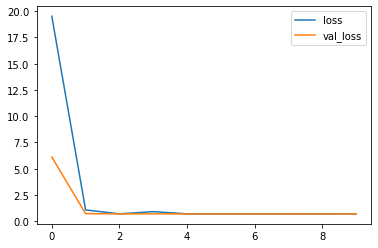

In [1074]:
pd.DataFrame(history.history).plot()

## binary classification without cross-var

In [1075]:
X_train,X_test,y_train,y_test = train_test_split(ratings_df_without_cross_df,binary_target_df, test_size = 0.1)

In [1076]:
model = keras.models.Sequential([
    keras.layers.Dense(300,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(100,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(30,activation = "relu", kernel_initializer = "he_normal"),
    keras.layers.Dense(1,activation = "sigmoid")
])

In [1077]:
model.compile(loss = keras.losses.binary_crossentropy,
             optimizer = "Adam")

In [1078]:
history = model.fit(X_train,y_train,
                   epochs= 10,
                    validation_data = (X_test,y_test)
                   )

Epoch 1/10
2836/2836 [==============================] - 1s 442us/step - loss: 91.5673 - val_loss: 0.8844
Epoch 2/10
2836/2836 [==============================] - 1s 423us/step - loss: 1.1328 - val_loss: 0.6923
Epoch 3/10
2836/2836 [==============================] - 1s 419us/step - loss: 0.7008 - val_loss: 0.6920
Epoch 4/10
2836/2836 [==============================] - 1s 420us/step - loss: 0.7634 - val_loss: 0.6922
Epoch 5/10
2836/2836 [==============================] - 1s 419us/step - loss: 0.6937 - val_loss: 0.6925
Epoch 6/10
2836/2836 [==============================] - 1s 423us/step - loss: 0.7118 - val_loss: 0.6924
Epoch 7/10
2836/2836 [==============================] - 1s 421us/step - loss: 0.7146 - val_loss: 0.6925
Epoch 8/10
2836/2836 [==============================] - 1s 422us/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/10
2836/2836 [==============================] - 1s 422us/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/10
2836/2836 [==============================] - 1s 421

<AxesSubplot:>

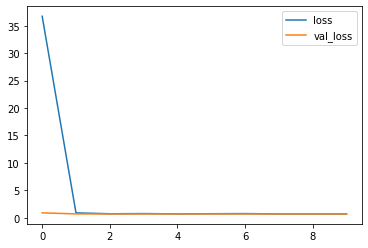

In [1079]:
pd.DataFrame(history.history).plot()

#### Crossval 만들기 - 2 ==> 계산 복잡도가 너무 커서 포기.

In [507]:
year_df.columns

Index(['year_0', 'year_1', 'year_2', 'year_3', 'year_4', 'year_5'], dtype='object')

In [508]:
genres_df.columns

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [526]:
cross_var_df = pd.DataFrame(index = ratings_df.index)

In [527]:
for i in year_df.columns:
    for j in genres_df.columns:
         cross_var_df[f"{i}_{j}"] = 0

In [528]:
cross_var_df

,year_0_(no genres listed),year_0_Action,year_0_Adventure,year_0_Animation,year_0_Children,year_0_Comedy,year_0_Crime,year_0_Documentary,year_0_Drama,year_0_Fantasy,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
ratings_df = pd.concat([ratings_df,cross_var_df],axis= 1)

In [531]:
ratings_df.head()

,userId,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,year_5_Film-Noir,year_5_Horror,year_5_IMAX,year_5_Musical,year_5_Mystery,year_5_Romance,year_5_Sci-Fi,year_5_Thriller,year_5_War,year_5_Western
0,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [564]:
for i in tqdm(ratings_df.index[:1000]):
    for year in year_df.columns:
        for genre in genres_df.columns:
            ratings_df.loc[i][f"{year}_{genre}"]= ratings_df.loc[i][year] & ratings_df.loc[i][genre]
                

100%|██████████| 1000/1000 [00:12<00:00, 82.90it/s]


In [ ]:
나중에 더미로 한번에 하면 빠를라나.